In [62]:
import numpy as np 
import pandas as pd

In [63]:
# Loading the Dataset
df = pd.read_csv('spam.csv', usecols=[0, 1], names=['label', 'message'], skiprows=1, encoding='latin1')

In [64]:
# Exploratory Data Analysis
df.shape

(5572, 2)

In [65]:
df.columns

Index(['label', 'message'], dtype='object')

In [66]:
df.dtypes

label      object
message    object
dtype: object

In [67]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [68]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [70]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [71]:
# Mapping values for label
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [72]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [73]:
# Importing Libraries for Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

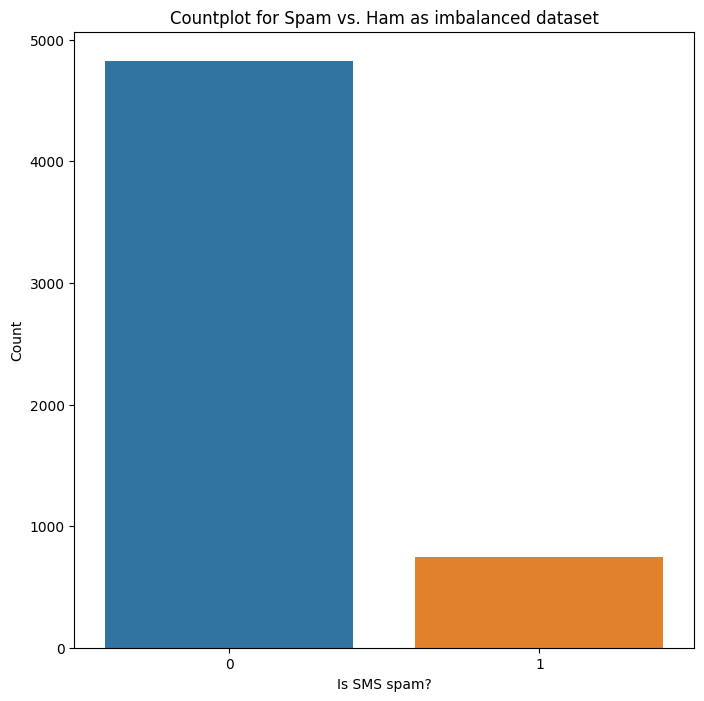

In [74]:
plt.figure(figsize=(8, 8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as imbalanced dataset')
p = plt.xlabel('Is SMS spam?')
p = plt.ylabel('Count')

Feature Engineering
- Handling imbalanced dataset using Oversampling
- Creating new features e.e: word_count, contains_currency_symbol, contains_numbers, etc.

In [75]:
# Handling Imbalanced Dataset using Oversampling
only_spam = df[df['label']==1]
print(f'Number of Spam records: {only_spam.shape[0]}')
print(f'Number of Ham records: {df.shape[0]-only_spam.shape[0]}')

Number of Spam records: 747
Number of Ham records: 4825


In [76]:
# Oversampling of spam labels

count = int((df.shape[0]-only_spam.shape[0])/only_spam.shape[0])
for i in range(0, count-1):
    df = pd.concat([df, only_spam])
    
df.shape

(9307, 2)

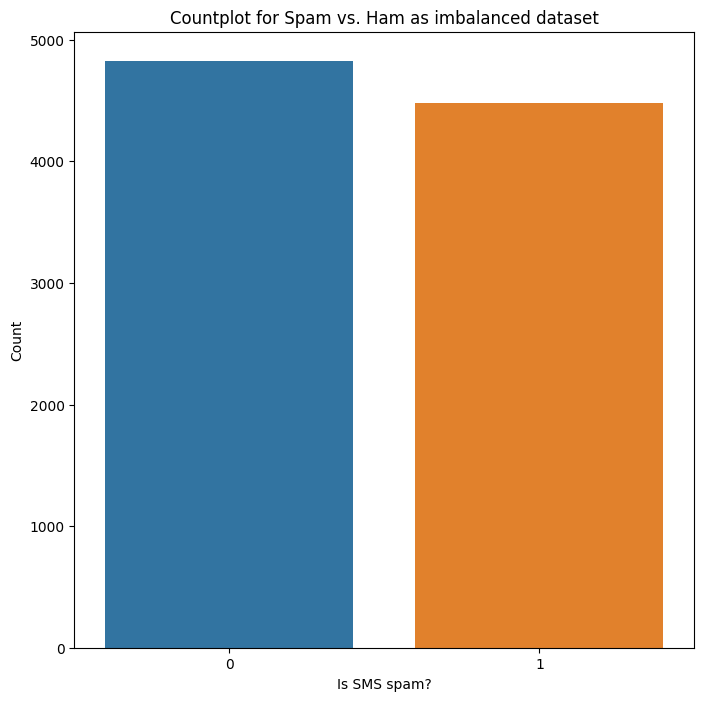

In [77]:
plt.figure(figsize=(8, 8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as imbalanced dataset')
p = plt.xlabel('Is SMS spam?')
p = plt.ylabel('Count')

In [80]:
# Creating new featrue word_count
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

In [81]:
df.head()

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


C:\Users\ksapp\AppData\Local\Temp\ipykernel_17624\3053872447.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df[df['label']==0].word_count)
C:\Users\ksapp\AppData\Local\Temp\ipykernel_17624\3053872447.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df[df['label']==1].word_co

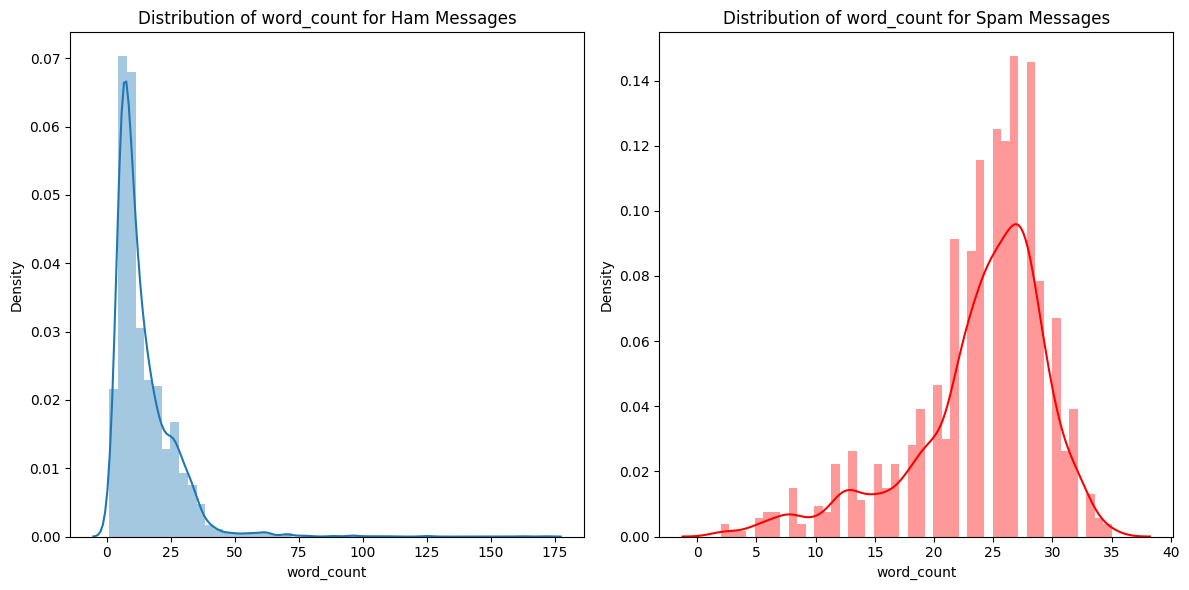

In [85]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=df[df['label']==0].word_count)
p = plt.title('Distribution of word_count for Ham Messages')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['label']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam Messages')

plt.tight_layout()
plt.show()

Insight : Spam messages word_count fall in the range of 15-30 words, whereas majority of the Ham messages fall in the range of below 25 words

In [86]:
# Creating feature contains_currency_symbol

# This function checkes whether the message has a currency symbol or not
def currency(x):
    currency_symbols = ['€', '$', '¥', '£', '₹']
    for i in currency_symbols:
        if i in x:
            return 1
    return 0

df['contains_currency_symbol'] = df['message'].apply(currency)

In [88]:
df.tail()

,label,message,word_count,contains_currency_symbol
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0
5567,1,This is the 2nd time we have tried 2 contact u...,30,1


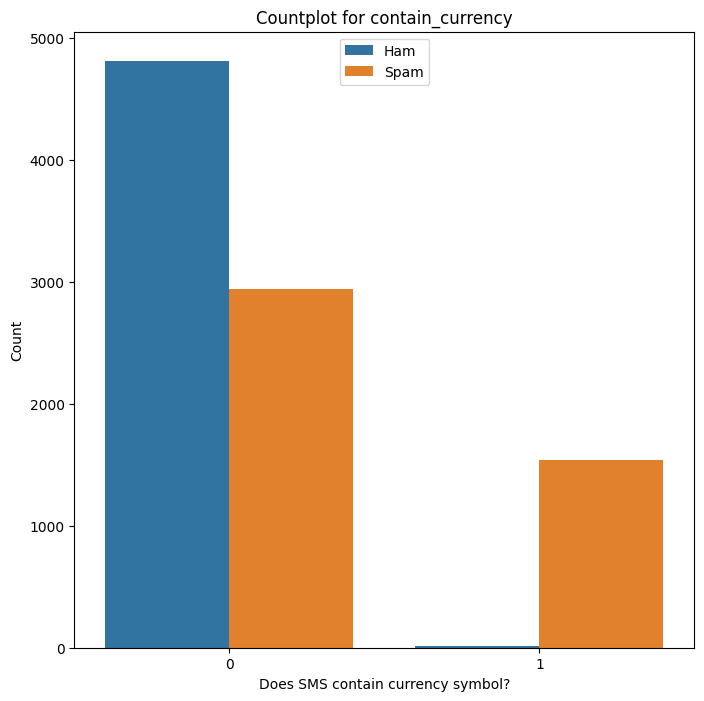

In [89]:
# Countplot for contais_currency_symbol
plt.figure(figsize=(8, 8))
g = sns.countplot(x='contains_currency_symbol', data=df, hue='label')
p = plt.title('Countplot for contain_currency')
p = plt.xlabel('Does SMS contain currency symbol?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

Insight :  Almost 1/3 of Spam Messages cointain currency symbols and currency symbols are rarely used in Ham messages

In [96]:
# Creating feature contains_number
def numbers(x):
    for i in x:
        if ord(i) >= 48 and ord(i) <= 57:
            return 1
    return 0

df['contains_numbers'] = df['message'].apply(numbers)

In [94]:
df.tail()

,label,message,word_count,contains_currency_symbol,contains_number
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1
5567,1,This is the 2nd time we have tried 2 contact u...,30,1,1


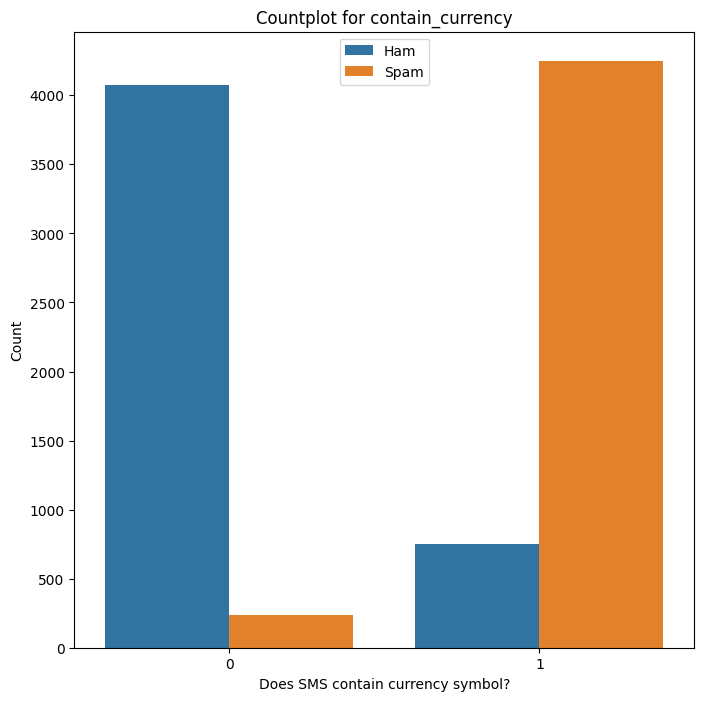

In [97]:
# Countplot for contais_currency_symbol
plt.figure(figsize=(8, 8))
g = sns.countplot(x='contains_numbers', data=df, hue='label')
p = plt.title('Countplot for contain_currency')
p = plt.xlabel('Does SMS contain currency symbol?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

Insight: It is evident that most of the Spam messages contain numbners, and majority of the Ham messages do not contain numbers

Data Cleaning
    - Removing special character and numbers using regular expression
    - Converting the entire sms into lower case
    - Tokenizing the sms by words
    - Removing the stop words
    - Lemmatizing the words
    - Joining the lemmatized words
    - Building a corpus of messages

In [98]:
# Importing essential libraries for performing NLP

import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ksapp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ksapp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [99]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.message):
    
    # Cleaning special character from the sms
    message = re.sub('[^a-zA-Z]', ' ', string=sms_string)
    
    # converting the entire sms into lower case
    message = message.lower()
    
    # Tokenizing the sms by words
    words = message.split()
    
    # Removing the stop words
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    
    # Lemmatizing the words
    lemmatized_words =[wnl.lemmatize(word) for word in filtered_words]
    
    # Joining the lemmatized words 
    message = ' '.join(lemmatized_words)
    
    # Building a corpus of messages
    corpus.append(message)

In [100]:
corpus[0:3]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']

In [128]:
# Creating the Bag of Words model

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']

# Model Building and Evaluation

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Fitting Naive Bayes to the Training Set

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print(f'--- Average F1-Score for MNB model: {round(cv.mean(), 3)} ---')
print(f'Standard Deviation: {round(cv.std(), 3)}')

--- Average F1-Score for MNB model: 0.944 ---
Standard Deviation: 0.004


In [107]:
# Classification report for MNB model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred =  mnb.predict(X_test)

print('--- Classification report for MNB model ---')
print(classification_report(y_test, y_pred))

--- Classification report for MNB model ---
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       958
           1       0.94      0.94      0.94       904

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



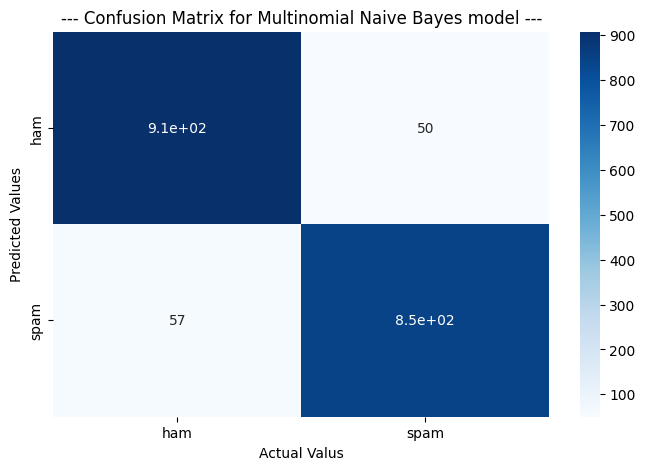

In [109]:
# Confusion matrix of MNB model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
p = plt.xlabel('Actual Valus')
p = plt.ylabel('Predicted Values')
p = plt.title('--- Confusion Matrix for Multinomial Naive Bayes model ---')